In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy import io
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
sns.set()

rcParams.update({'font.size': 14})

In [2]:
# Generate data with make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

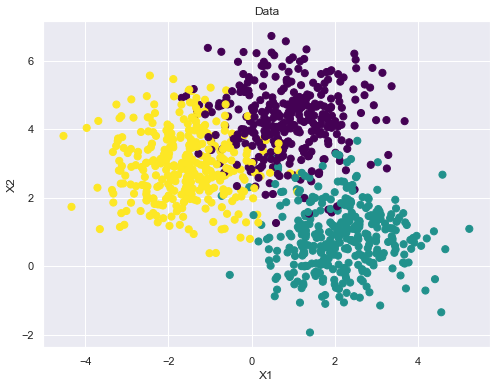

In [3]:
# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [4]:
# Fit a Gaussian mixture with EM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X)
AIC = gmm.aic(X)

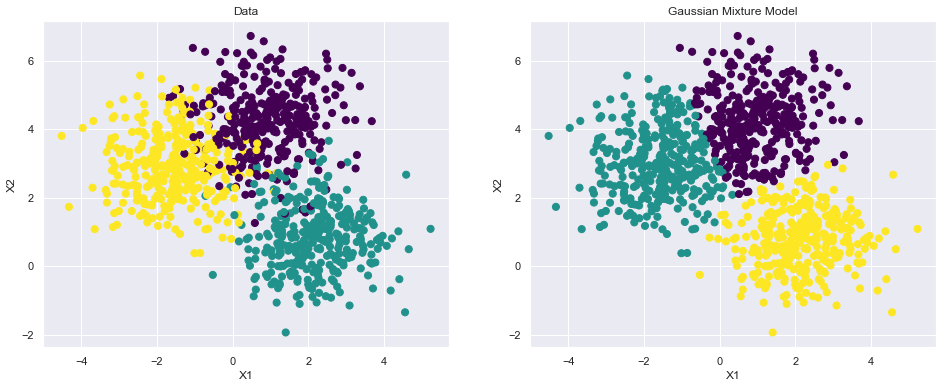

In [5]:
# Plot data and the Gaussian mixture model with original labels
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
ax[0].set_title('Data')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')

ax[1].scatter(X[:, 0], X[:, 1], c=gmm.predict(X), s=50, cmap='viridis')
ax[1].set_title('Gaussian Mixture Model')
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')
plt.show()

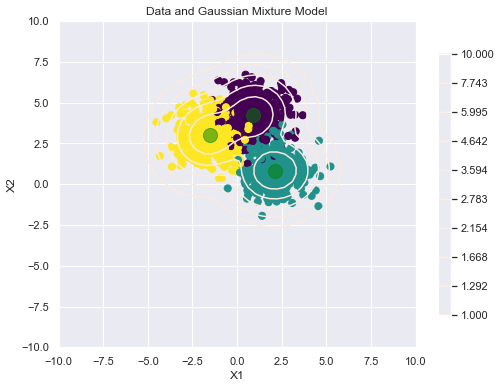

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Data and Gaussian Mixture Model')
plt.xlabel('X1')
plt.ylabel('X2')
x = np.linspace(-10, 10)
y = np.linspace(-10, 10)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)
CS = plt.contour(X, Y, Z, norm=plt.Normalize(vmin=0, vmax=1), levels=np.logspace(0, 1, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='green', s=200, alpha=0.5)
plt.show()